# Part 1: Working with RGB images

## Preparation

In [1]:
import matplotlib.pyplot as plt

# plots directly in the notebook
%matplotlib inline 

# make figures larger (reduce if figures are too wide for your screen)
plt.rcParams["figure.figsize"] = (7,7)

# if you have a high-dpi monitor
#%config InlineBackend.figure_format = 'retina' 

In [2]:
import numpy as np
import skimage
import skimage.data
import skimage.io

## Representation of color images
Color images are three-dimensional numpy array whose third dimension has length 3.  These are called *channels* and correspond to red, green, blue intensities for each pixel.

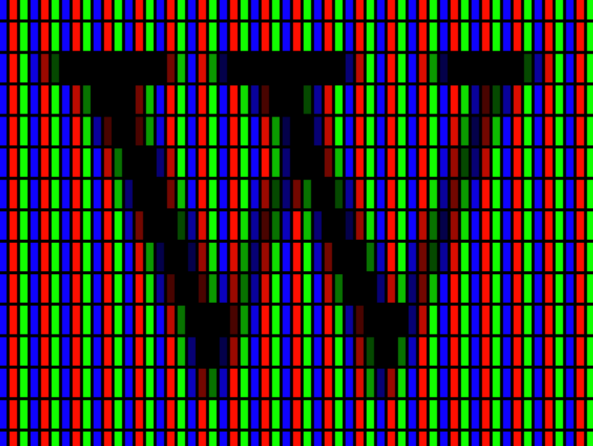

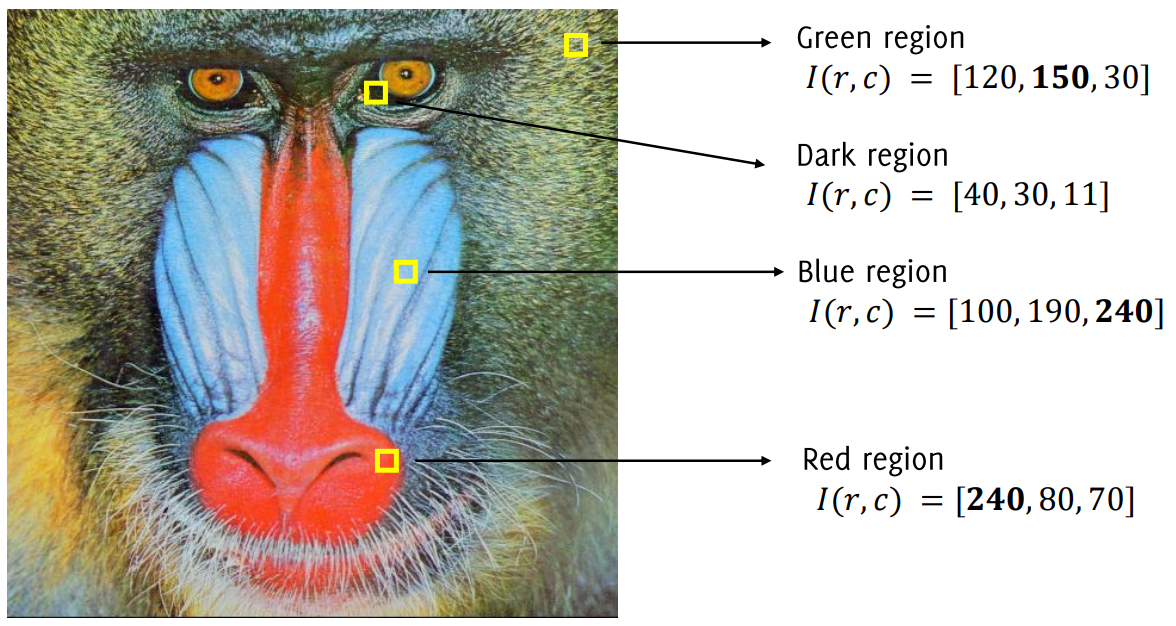

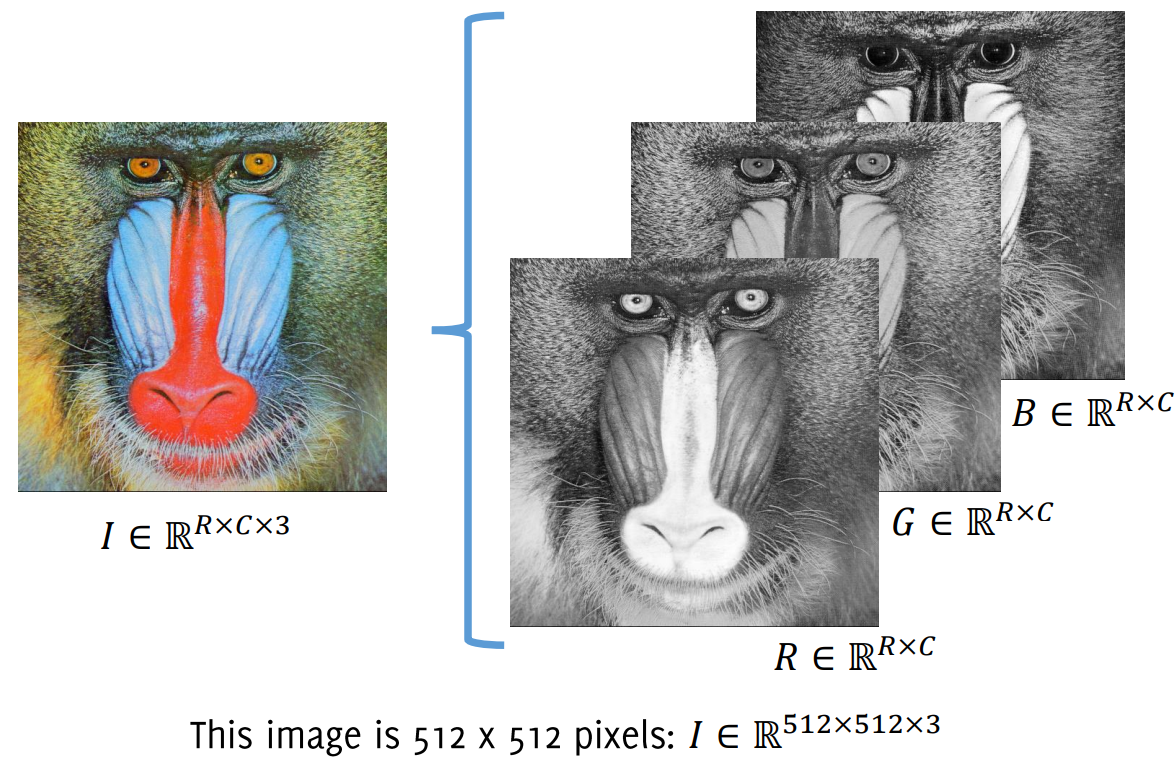

### Load a color image

In [ ]:
import skimage
import skimage.data
import matplotlib.pyplot as plt
im = skimage.data.coffee()
print(im.shape, im.dtype) # note third dimension
plt.imshow(im)

In [ ]:
# Visualize the red, green, blue channels as grayscale images
plt.imshow(np.hstack((
        im[:,:,0],
        im[:,:,1],
        im[:,:,2])),
    vmin=0, vmax=255, cmap="gray")

## Exercise 1
- Find a picture from your library that represents a landscape on a sunny day with a blue sky
- Save it as jpg or png in the current directory
- Load it in python using [`skimage.io.imread`](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread).
- Print the image's size and visualize the image
- Resize it in such a way that the largest dimension (height or width) is 1000 pixels, but do not significantly change the ratio between the width and height.  For example, if your original image is 2000x1500 pixels, you want the resized version to be 1000x750.  Use [`skimage.transform.resize`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.resize).
- Display the resized image
- Display the three channels of the image (red, green, blue), each as grayscale (as in the example above).  Confirm that the blue sky has more blue content than red and green.
- Generate a boolean image (a 2D array that contains either True or False), that is as big as your image, such that only the sky (and maybe other objects that have a sky-like color) is True, and everything else is False. Call this image `mask`. Visualize it. Note: it does not have to be perfect!. Look at the hint below for tips on the implementation.
- Modify your image in such a way that the sky becomes black. Or white. Or red... (you choose).
- Modify your image in such a way that the sky becomes 50% darker (i.e. multiply its r,g,b, values by 0.5).

In [5]:
# Hint
import numpy as np
a = np.array([[1,2,3],[2,3,4]])
print(a)
print(a >= 3) # Compare every element of a, returns a boolean array the same size of a
mask = (a >= 3) | (a <= 1) # elementwise OR between two arrays
print(mask) 
a[mask] = 0
print(a)

# Note: if your

[[1 2 3]
 [2 3 4]]
[[False False  True]
 [False  True  True]]
[[ True False  True]
 [False  True  True]]
[[0 2 0]
 [2 0 0]]


In [ ]:
# Solution
...


## Exercise 2: Flags
Choose one or two flags.  For each, build an image as a 3d array with 300 rows, 400 columns and 3 channels (`shape` should be `(200,300,3)`).  Then, display it.  If you need to know rgb values for a color, have a look here: https://en.wikipedia.org/wiki/Web_colors.  Even better: wikipedia has the exact RGB colors for each flag.

### Easy
Germany, France, Italy, Sweden ...

### Medium
Switzerland

### Hard (optional)
Flag of Scotland

### Very Hard (optional, see below)
Flag of Japan

### Good Luck (don't do it)
Flag of [Deadpool](https://en.wikipedia.org/wiki/Deadpool_(film))
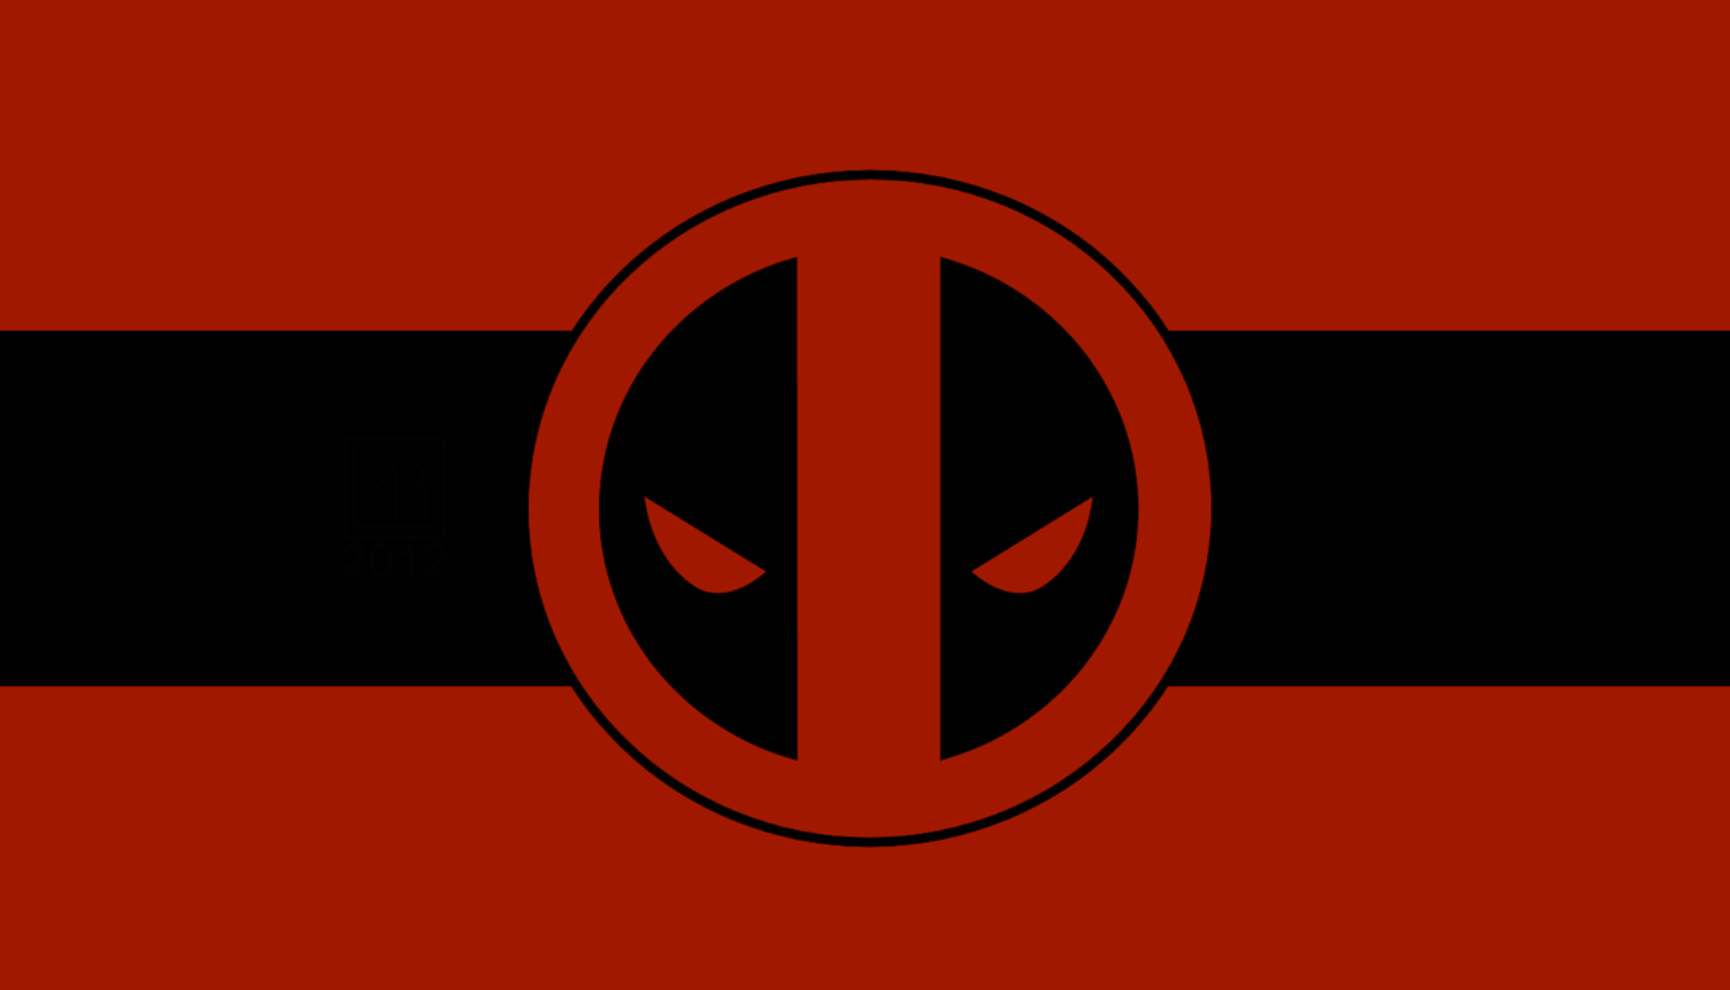

(props to the student who actually took the time to make this. Politecnico di Milano, 2018).

In [ ]:
# Solution
...


### Advanced: example trick for the flag of Japan
Trick: make the following arrays with the requested shape `(200,300)`:
- the array containing the x coordinate of each element (i.e. the column)
- the array containing the y coordinate of each element (i.e. the row)
- the array containing the distance from the center of each element

once you have that, building the flag is easy.  Have a try, then look at the solution.

In [ ]:
# Hint: solution for the flag of Japan
h,w = 200,300
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3, figsize=(15,5))
flag = np.zeros((h,w,3)) + 1.0

x_distancefromcenter = (np.arange(0,w)-(w/2))[np.newaxis,:]
print(x_distancefromcenter.shape)


y_distancefromcenter = (np.arange(0,h)-(h/2))[:,np.newaxis]
print(y_distancefromcenter.shape)

distancefromcenter = (x_distancefromcenter**2 + y_distancefromcenter**2)**0.5 # note automatic broadcasting

him = ax0.imshow((x_distancefromcenter**2 + y_distancefromcenter**2)**0.5)
plt.colorbar(him,ax=ax0)
ax0.set_title("distance from center")

flag[distancefromcenter<80,:] = np.array([[[1.0, 0, 0]]])
ax1.imshow(flag)
ax1.set_title("Flag as float values (0-1)")

flag = (flag*255).astype("ubyte")
ax2.imshow(flag)
ax2.set_title("Flag as int values (0-255)")

# Part 2: Working with video data
Videos are just a sequence of multiple frames.  Each frame might be grayscale or color.  Let's read in all frames of a brief video.

In [ ]:
import ipywidgets as ipw
ims = []
for i in range(1,43):
    ims.append(skimage.io.imread(f"data/video_frames/{i:08d}.png"))

ims = np.array(ims)
print(ims.shape)
    
@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    plt.imshow(ims[i])

## Exercise 3
### 3.1
Explain the result of the cell below

In [ ]:
y = 80
plt.imshow(ims[:,y,:,:])

Solution:

Double click this cell and edit the text to explain the result you see above.
- What does the x axis represent?
- What does the y axis represent?
- Why do we see a diagonal dark line?
- Why do we see a vertical dark line on the left?
- What does the slope of the diagonal line represent?
- Predict (then check) how the image looks like when you use y=20 or y=100

### 3.2

WITHOUT running the code, try to predict how this image looks like.

```
x = 100
plt.imshow(ims[:,:,x,:])
```

### 3.3
We want to find the position of the girl for every frame in the video.  Point 1 of this exercise gives us a hint for a possible solution:
- take the frame of interest
- make it grayscale (use [`skimage.color.rgb2gray`](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray))
- consider the intensity values at row 80 (note: this corresponds to the grayscale version of a row of the image in the point 1 of this exercise)
- look for the index where the minimum intensity is found (use [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)), but ignoring the first few elements that are always very dark.
- this index corresponds to the approximate x coordinate of the girl in the image

Now:
- Implement this idea in a function defined as below.
- Check with a few examples that the approach works as you expected.
- Check that your function works by visualizing each frame as in the cell below
- Draw a plot with time (expressed in frames) on the $x$ axis, and the girl's horizontal position in the image (in pixels) on the y axis.  Label the axes correctly

In [ ]:
# Solution
def girlposition(i):
    # returns the x coordinate of the girl at frame i
    im = ims[i,:,:,:] # this is the frame of interest
    ...
    return 42
    


In [ ]:
# Visualization
@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    fig, ax = plt.subplots()
    ax.imshow(ims[i])
    ax.axvline(x=girlposition(i))

### 3.4: finding the background
- Convert every frame of the video to grayscale and make sure it is a floating point image with range $[0,1]$. Put the results in a 3D array called `imsg`, which will have shape: `(42, 144, 180)`.
- Visualize the grayscale video with an interactive slider, as in the code above. Verify that it looks as you expect.
- Given a coordinate `(row,column)` in the image, draw the plot of the intensity of that pixel over time; use `plt.plot` to make a line plot with the frame number on the $x$ axis and the intensity of the selected pixel on the $y$ axis.  Try this for a coordinate in which the girl overlaps the pixel; make sure you understand the results: you should see the intensity being high, low for some frames (as the girl overlaps the pixel), then high again.
- The median of the plotted intensity values represents the intensity of that pixel in the background of the image. Make sure you understand why!
- You can compute the median value of every pixel using [`bg = np.median(imsg, axis=0)`](https://numpy.org/doc/stable/reference/generated/numpy.median.html), which should return a 2D array the shape of your image, i.e. `(144, 180)`.  Visualize the background: does it make sense?

### 3.5
For a given frame, compute the absolute value of the difference between the frame and the background.  We expect that the background looks black (i.e. the difference is zero), whereas any pixel overlapping the girl looks bright (the difference is far from zero -- negative or positive).

Build a binary mask of the girl by thresholding the "absolute difference" image defined above: any value above a given threshold should be `True` (a pixel belonging to the girl image); otherwise `False` (background).

In [ ]:
# Solution
...


### 3.6
Visualize a video of the girl running over a uniform white backgorund

In [ ]:
# Solution
...


## Exercise 4: Timewarp scan

Read [here](https://www.insider.com/tiktok-time-warp-scan-filter-line-trends-how-to-2020-10) about the Tik Tok Timewarp Scan filter.  You can try an interactive version on your browser [here](https://timewarpscan.me/).

Make a function that, given a 4d array representing a video with shape `(frames, height, width, 3)`, generates a single image with shape `(height, width, 3)` that is the final image of the timewarp effect.

First, assume that the "blue line" of the timewarp effect is horizontal; it moves vertically starting from the top of the image at the beginning of the video, and ending at the bottom of the image at the end of the video.  The movement velocity of the line will therefore be `height/frames` rows per frame.

Test your code on the running girl video.

Then, shoot a short video with your webcam, save it as mp4; then load it in python and try your code on that.  To load a video, you can either convert it to individual frames (e.g. using ffmpeg), or use specialized libraries; an overview of options is [here](https://scikit-image.org/docs/stable/user_guide/video.html)

In [ ]:
# Solution
...
